## Machine Learning en Spark

In [1]:
from pyspark.context import SparkContext
print ("Running Spark Version %s" % (sc.version))

Running Spark Version 2.4.3


In [2]:
from pyspark.conf import SparkConf
conf = SparkConf()
print(conf.toDebugString())

spark.app.name=PySparkShell
spark.eventLog.dir=file:///G:/spark_outputs/logs/spark-events/
spark.eventLog.enabled=true
spark.history.fs.logDirectory=file:///G:/spark_outputs/logs/spark-events/
spark.master=local[*]
spark.submit.deployMode=client
spark.ui.showConsoleProgress=true


In [3]:
df_cars = spark.read.option("header",True).option("inferSchema",True).csv('car-milage.csv')

In [4]:
df_cars.printSchema()

root
 |-- mpg: double (nullable = true)
 |-- displacement: double (nullable = true)
 |-- hp: integer (nullable = true)
 |-- torque: integer (nullable = true)
 |-- CRatio: double (nullable = true)
 |-- RARatio: double (nullable = true)
 |-- CarbBarrells: integer (nullable = true)
 |-- NoOfSpeed: integer (nullable = true)
 |-- length: double (nullable = true)
 |-- width: double (nullable = true)
 |-- weight: integer (nullable = true)
 |-- automatic: integer (nullable = true)



In [5]:
df_cars.count()

32

In [6]:
df_cars.show(32)

+-----+------------+---+------+------+-------+------------+---------+------+-----+------+---------+
|  mpg|displacement| hp|torque|CRatio|RARatio|CarbBarrells|NoOfSpeed|length|width|weight|automatic|
+-----+------------+---+------+------+-------+------------+---------+------+-----+------+---------+
| 18.9|       350.0|165|   260|   8.0|   2.56|           4|        3| 200.3| 69.9|  3910|        1|
| 17.0|       350.0|170|   275|   8.5|   2.56|           4|        3| 199.6| 72.9|  3860|        1|
| 20.0|       250.0|105|   185|  8.25|   2.73|           1|        3| 196.7| 72.2|  3510|        1|
|18.25|       351.0|143|   255|   8.0|    3.0|           2|        3| 199.9| 74.0|  3890|        1|
|20.07|       225.0| 95|   170|   8.4|   2.76|           1|        3| 194.1| 71.8|  3365|        0|
| 11.2|       440.0|215|   330|   8.2|   2.88|           4|        3| 184.5| 69.0|  4215|        1|
|22.12|       231.0|110|   175|   8.0|   2.56|           2|        3| 179.3| 65.4|  3020|        1|


In [7]:
df_cars = df_cars.na.drop()

In [8]:
df_cars.count()

30

In [9]:
df_cars.show(30)

+-----+------------+---+------+------+-------+------------+---------+------+-----+------+---------+
|  mpg|displacement| hp|torque|CRatio|RARatio|CarbBarrells|NoOfSpeed|length|width|weight|automatic|
+-----+------------+---+------+------+-------+------------+---------+------+-----+------+---------+
| 18.9|       350.0|165|   260|   8.0|   2.56|           4|        3| 200.3| 69.9|  3910|        1|
| 17.0|       350.0|170|   275|   8.5|   2.56|           4|        3| 199.6| 72.9|  3860|        1|
| 20.0|       250.0|105|   185|  8.25|   2.73|           1|        3| 196.7| 72.2|  3510|        1|
|18.25|       351.0|143|   255|   8.0|    3.0|           2|        3| 199.9| 74.0|  3890|        1|
|20.07|       225.0| 95|   170|   8.4|   2.76|           1|        3| 194.1| 71.8|  3365|        0|
| 11.2|       440.0|215|   330|   8.2|   2.88|           4|        3| 184.5| 69.0|  4215|        1|
|22.12|       231.0|110|   175|   8.0|   2.56|           2|        3| 179.3| 65.4|  3020|        1|


## Funciones estadísticas

In [10]:
df_cars.describe().show()
df_cars.describe("mpg","hp","weight","automatic").show()

+-------+------------------+------------------+------------------+----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-------------------+
|summary|               mpg|      displacement|                hp|          torque|            CRatio|           RARatio|     CarbBarrells|         NoOfSpeed|            length|            width|           weight|          automatic|
+-------+------------------+------------------+------------------+----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-------------------+
|  count|                30|                30|                30|              30|                30|                30|               30|                30|                30|               30|               30|                 30|
|   mean|20.038333333333334| 286.0466666666667|136.9666666666666

In [11]:
# Correlaciones/Covarianzas
cor1 = df_cars.stat.corr("hp","weight",method="pearson")
print ("hp to weight : Correlation = {0:.4f}".format(cor1))
# cor2 = df_cars.stat.corr("hp","weight",method="spearman")
# print "hp to weight : Correlation = {0:.4f}".format(cor2)
cov = df_cars.stat.cov("hp","weight")
print ("hp to weight : Covariance = {0:.4f}".format(cov))


hp to weight : Correlation = 0.8879
hp to weight : Covariance = 37304.2345


## Regresión lineal

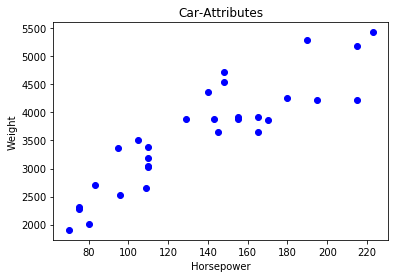

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

df_pandas = df_cars.toPandas() 
plt.plot( df_pandas ["hp"], df_pandas ["weight"],'bo' )
plt.ylabel('Weight')
plt.xlabel('Horsepower')
plt.title("Car-Attributes")
plt.show()

In [13]:
# Features (Modelamos mpg a partir del resto de datos)
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(
    inputCols=["displacement","hp","torque","CRatio","RARatio","CarbBarrells","NoOfSpeed","length","width","weight","automatic"],
    outputCol="features")

df_cars_features = assembler.transform(df_cars)
df_cars_features.show()

+-----+------------+---+------+------+-------+------------+---------+------+-----+------+---------+--------------------+
|  mpg|displacement| hp|torque|CRatio|RARatio|CarbBarrells|NoOfSpeed|length|width|weight|automatic|            features|
+-----+------------+---+------+------+-------+------------+---------+------+-----+------+---------+--------------------+
| 18.9|       350.0|165|   260|   8.0|   2.56|           4|        3| 200.3| 69.9|  3910|        1|[350.0,165.0,260....|
| 17.0|       350.0|170|   275|   8.5|   2.56|           4|        3| 199.6| 72.9|  3860|        1|[350.0,170.0,275....|
| 20.0|       250.0|105|   185|  8.25|   2.73|           1|        3| 196.7| 72.2|  3510|        1|[250.0,105.0,185....|
|18.25|       351.0|143|   255|   8.0|    3.0|           2|        3| 199.9| 74.0|  3890|        1|[351.0,143.0,255....|
|20.07|       225.0| 95|   170|   8.4|   2.76|           1|        3| 194.1| 71.8|  3365|        0|[225.0,95.0,170.0...|
| 11.2|       440.0|215|   330| 

In [14]:
# Split data
train, test = df_cars_features.select("mpg","features").randomSplit([0.8,0.2], seed=42)
train.show()
test.show()

+-----+--------------------+
|  mpg|            features|
+-----+--------------------+
| 11.2|[440.0,215.0,330....|
| 13.9|[351.0,148.0,243....|
|14.39|[500.0,190.0,360....|
|14.89|[440.0,215.0,330....|
|16.41|[318.0,145.0,255....|
| 16.5|[350.0,155.0,250....|
| 16.5|[360.0,165.0,255....|
| 17.0|[350.0,170.0,275....|
| 17.8|[302.0,129.0,220....|
| 17.8|[350.0,155.0,250....|
| 18.9|[350.0,165.0,260....|
| 19.7|[258.0,110.0,195....|
| 20.0|[250.0,105.0,185....|
|20.07|[225.0,95.0,170.0...|
| 20.3|[140.0,83.0,109.0...|
|21.47|[262.0,110.0,200....|
|21.47|[360.0,180.0,290....|
| 21.5|[171.0,109.0,146....|
|22.12|[231.0,110.0,175....|
|23.54|[231.0,110.0,175....|
+-----+--------------------+
only showing top 20 rows

+-----+--------------------+
|  mpg|            features|
+-----+--------------------+
|13.27|[351.0,148.0,243....|
|13.27|[460.0,223.0,366....|
|13.77|[360.0,195.0,295....|
|18.25|[351.0,143.0,255....|
|19.73|[318.0,140.0,255....|
+-----+--------------------+



In [16]:
# Train model
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol="mpg", maxIter=100, regParam=0.3, elasticNetParam=0.8)
model = lr.fit(train)

In [20]:
print (model.coefficients) 
print (model.intercept)
trSummary = model.summary
print ("numIterations: " + str(trSummary.totalIterations))
print ("Iteration Summary History: " + str(trSummary.objectiveHistory))
trSummary.residuals.show()
print ("RMSE: " + str(trSummary.rootMeanSquaredError))
print ("r2: " + str(trSummary.r2))

[-0.010972748525383264,-0.012788534771889513,-0.011549875219324364,1.0864259517626724,1.4691216024534852,0.0,0.0,0.0,-0.14790744325252406,-0.001285094262731583,0.0]
29.15726405117587
numIterations: 11
Iteration Summary History: [0.5000000000000009, 0.40117529731398494, 0.16617078122184098, 0.1624832335609037, 0.21828449887964044, 0.1546085408101498, 0.15354961616427543, 0.1534313864472479, 0.15334465019077181, 0.15308870444362024, 0.15281773644669164]
+--------------------+
|           residuals|
+--------------------+
|  -4.085738019356116|
| -2.7274970681815542|
|  2.6627269538523066|
|   2.683163730712618|
|  -2.087469340719249|
| -1.7097205096572168|
| -1.9880121424073849|
|-0.21919089576703144|
| -1.0074054014342089|
| -0.7029895282444834|
|  1.6073636613439994|
| -0.4575663214455581|
| -0.7186716649266138|
| -1.6766630403050513|
|   -5.38715484469688|
| -0.3315154168148631|
|    5.93598810646561|
|  -3.033023124385938|
|0.027180392259428032|
|  1.4857332201413769|
+--------------

In [17]:
# Predict model
predictions = model.transform(test)
predictions.show()

+-----+--------------------+------------------+
|  mpg|            features|        prediction|
+-----+--------------------+------------------+
|13.27|[351.0,148.0,243....|16.320520586631346|
|13.27|[460.0,223.0,366....|12.082929107010496|
|13.77|[360.0,195.0,295....|16.939078323839304|
|18.25|[351.0,143.0,255....| 17.36238352358282|
|19.73|[318.0,140.0,255....|17.635772398771298|
+-----+--------------------+------------------+



In [23]:
# Model evalluation
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="mpg")
rmse = evaluator.evaluate(predictions)
print ("Root Mean Squared Error = {0:.4f}".format(rmse))
evaluator.setMetricName("mse")
mse = evaluator.evaluate(predictions)
print ("Mean Squared Error = {0:.4f}".format(mse))

Root Mean Squared Error = 2.2449
Mean Squared Error = 5.0396
